Column Description
name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
data = pd.read_csv('/content/indian_food.csv')

In [ ]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
data.isnull().any()

,0
name,False
ingredients,False
diet,False
prep_time,False
cook_time,False
flavor_profile,False
course,False
state,False
region,True


In [ ]:
data.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1


In [ ]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)

In [ ]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [ ]:
data.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,30
cook_time,28
flavor_profile,29
course,0
state,24
region,14


In [ ]:
data.shape

(255, 9)

In [ ]:
pie_data = data.diet.value_counts().reset_index()


In [ ]:
pie_data.columns = ['diet','count']
fig = px.pie(pie_data, values='count', names='diet', title='Diet Distribution', color_discrete_sequence=['green','red'])
fig.show()

In [ ]:
cooking_time= data[['name','cook_time']]
cooking_time.head()

,name,cook_time
0,Balu shahi,25.0
1,Boondi,30.0
2,Gajar ka halwa,60.0
3,Ghevar,30.0
4,Gulab jamun,40.0


In [ ]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

In [ ]:
ten_cook_quick=cooking_time.head(10)

In [ ]:
fig = px.bar(ten_cook_quick, x='name', y='cook_time', title='Top 10 Quick Cooking Dishes', color_discrete_sequence=['green'])
fig.show()

In [ ]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [ ]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

In [ ]:
tencooking_time_longest=cooking_time_longest.head(10)

In [ ]:
import matplotlib.pyplot as plt

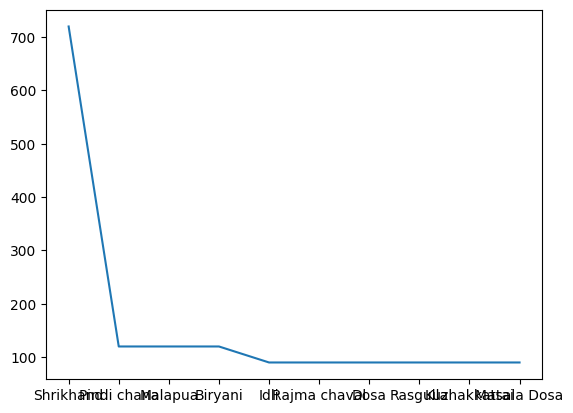

In [ ]:
y = tencooking_time_longest['name']
x = tencooking_time_longest['cook_time']
plt.plot(y,x)